# PCA Analysis

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Logging
import logging
logging.basicConfig(format='%(message)s')
log = logging.getLogger()
log.setLevel(logging.INFO)

random_seed = 10459
np.random.seed = random_seed
log.info(f"Random seed fixed as {random_seed}")

Random seed fixed as 10459


In [29]:
targets = pd.read_csv("/Users/matina/Desktop/Workflow/DDGset2.csv")

In [39]:
features = pd.read_csv("/Users/matina/Desktop/Workflow/dftset2/modif/reactionmatrix.csv")
log.info("Columns: {}".format(features.columns))

Columns: Index(['-5.24E+00', '-1.15E+00', '8.63E-02', '-5.24E-02', '-4.67E-02',
       '4.80E+00', '4.27E+00', '3.04E+00', '8.77E+00', '4.19E+00', '2.40E+00',
       '8.53E+00', '4.64E+00', '2.59E+00', '8.83E+00', '9.02E+00', '1.76E+00',
       '6.50E+00', '-1.70E+00', '1.12E+00', '1.63E+00', '1.00E+01', '4.61E-01',
       '-5.04E-01', '1.51E-01', '4.50E-02', '8.09E+00', '1.03E+03', '1.81E+02',
       '2.39E+02', '3.34E+00', '1.88E+00', '2.02E+00', '6.83E+00', '2.57E+00',
       '1.12E+01', '6.14E+00', '1.88E+00.1', '5.36E+00', '5.64E+00',
       '3.54E+00', '8.61E+00', '7.16E+00', '4.07E+00', '7.73E+00', '6.85E+00',
       '2.93E+00', '9.60E+00', '6.80E+00', '1.70E+00', '3.15E+00',
       '3.34E+00.1', '1.88E+00.2', '2.02E+00.1'],
      dtype='object')


In [40]:
clf_df = features.copy()
clf_df.columns

Index(['-5.24E+00', '-1.15E+00', '8.63E-02', '-5.24E-02', '-4.67E-02',
       '4.80E+00', '4.27E+00', '3.04E+00', '8.77E+00', '4.19E+00', '2.40E+00',
       '8.53E+00', '4.64E+00', '2.59E+00', '8.83E+00', '9.02E+00', '1.76E+00',
       '6.50E+00', '-1.70E+00', '1.12E+00', '1.63E+00', '1.00E+01', '4.61E-01',
       '-5.04E-01', '1.51E-01', '4.50E-02', '8.09E+00', '1.03E+03', '1.81E+02',
       '2.39E+02', '3.34E+00', '1.88E+00', '2.02E+00', '6.83E+00', '2.57E+00',
       '1.12E+01', '6.14E+00', '1.88E+00.1', '5.36E+00', '5.64E+00',
       '3.54E+00', '8.61E+00', '7.16E+00', '4.07E+00', '7.73E+00', '6.85E+00',
       '2.93E+00', '9.60E+00', '6.80E+00', '1.70E+00', '3.15E+00',
       '3.34E+00.1', '1.88E+00.2', '2.02E+00.1'],
      dtype='object')

In [41]:
clf_df

,-5.24E+00,-1.15E+00,8.63E-02,-5.24E-02,-4.67E-02,4.80E+00,4.27E+00,3.04E+00,8.77E+00,4.19E+00,...,7.73E+00,6.85E+00,2.93E+00,9.60E+00,6.80E+00,1.70E+00,3.15E+00,3.34E+00.1,1.88E+00.2,2.02E+00.1
0,-4.70,-0.976,0.0886,-0.0488,-0.07500,3.70,4.28,2.27,8.85,4.23,...,7.73,6.85,2.93,9.6,6.8,1.7,3.15,3.34,1.88,2.02
1,-5.79,-1.350,0.0862,-0.0520,-0.06470,3.17,4.32,3.05,5.97,4.19,...,7.73,6.85,2.93,9.6,6.8,1.7,3.15,3.34,1.88,2.02
2,-5.12,-1.560,0.0952,-0.0495,-0.05670,4.15,4.29,1.93,7.23,5.38,...,7.73,6.85,2.93,9.6,6.8,1.7,3.15,3.34,1.88,2.02
3,-5.06,-0.981,0.0863,-0.0492,-0.02980,6.04,4.27,3.12,5.95,4.18,...,7.73,6.85,2.93,9.6,6.8,1.7,3.15,3.34,1.88,2.02
4,-5.05,-1.150,0.1210,-0.0517,-0.02930,6.26,4.70,3.01,6.72,4.19,...,7.73,6.85,2.93,9.6,6.8,1.7,3.15,3.34,1.88,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,-4.77,-1.340,0.1210,-0.0496,-0.00268,5.30,4.70,3.00,7.25,6.09,...,6.52,6.90,3.12,10.0,6.8,1.7,3.15,3.34,1.88,2.02
85,-4.83,-1.290,0.0936,-0.0503,-0.00939,4.80,4.63,2.22,7.30,4.53,...,6.52,6.90,3.12,10.0,6.8,1.7,3.15,3.34,1.88,2.02
86,-4.89,-1.350,0.1260,-0.0519,-0.00373,6.13,4.67,3.07,7.36,4.59,...,6.52,6.90,3.12,10.0,6.8,1.7,3.15,3.34,1.88,2.02
87,-4.90,-1.330,0.1240,-0.0527,-0.00403,5.96,6.71,3.08,7.44,4.59,...,6.52,6.90,3.12,10.0,6.8,1.7,3.15,3.34,1.88,2.02


In [34]:
# clf_df.drop(["names", "smiles"],axis=1, inplace=True)
X = clf_df
y = targets # is not used

scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X)

Calculate number of components necessary

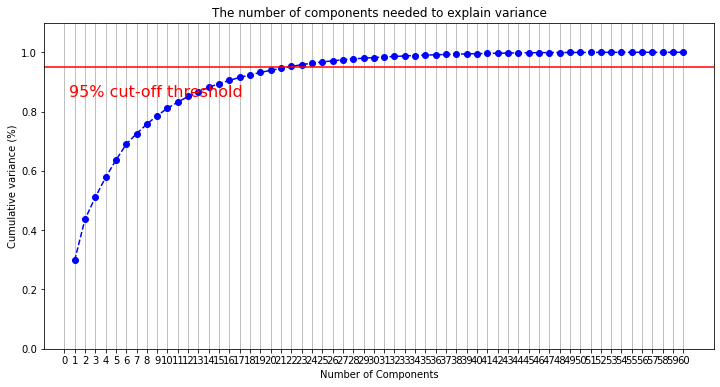

In [36]:
pca = PCA().fit(data_rescaled)
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 61, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 61, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

PCA Model

In [38]:
model = PCA(n_components = 0.95, whiten=True).fit(data_rescaled)
X_pc = model.transform(data_rescaled)


# number of components = 7 from above
#n_pcs= model.components_.shape[0]
#print(n_pcs)

n_pcs = 21

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['HOMOsub', 'LUMOsub', 'C1', 'N1', 'Cindole', 'Dipolesub', 'L(N-C1)',
       'B1(N-C1)', 'B5(N-C1)', 'L(N-C3)', 'B1(N-C3)', 'B5(N-C3)', 'L(N-C12)',
       'B5(H-Cind+A2ole)', 'B5(N-C12)', 'L(H-Cindole)', 'B1(H-Cindole)',
       'B5(H-Cindole)', 'HOMO', 'LUMO', 'TOTAL NH', 'TOTAL CN', 'TOTAL N49-H',
       'Cl- Charge', 'TOTAL Hcharge', 'AVG H CHRG', 'DIPOLE', '49Cl NMR',
       'AVG H NMR', 'AVG C NMR', 'L1(N2-C1)', 'B1(N2-C1)', 'B5(N2-C1)',
       'L1(N2-C2)', 'B1(N2-C2)', 'B5(N2-C2)', 'L1(N2-C43)', 'B1(N2-C43)',
       'B5(N2-C43)', 'L1(N6-C5)', 'B1(N6-C5)', 'B5(N6-C5)', 'L1(N9-C10)',
       'B1(N9-C10)', 'B5(N9-C10)', 'L1(N26-C11)', 'B1(N26-C11)', 'B5(N26-C11)',
       'L1(N26-C52)', 'B1(N26-C52)', 'B5(N26-C52)', 'L1(N26-C51)',
       'B1(N26-C51)', 'B5(N26-C51)', 'L1(N9-H27)', 'B1(N9-H27)', 'B5(N9-H27)',
       'L1(N6-C28)', 'B1(N6-C28)', 'B5(N6-C28)']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print(most_important_names)

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))
df


['B1(N-C1)', 'B5(N26-C51)', 'TOTAL NH', 'B5(N-C12)', 'AVG H NMR', 'TOTAL NH', 'HOMO', 'L1(N6-C5)', 'L(H-Cindole)', 'B1(N9-H27)', 'L(N-C12)', 'Dipolesub', 'B5(N9-H27)', 'L1(N9-H27)', 'L(N-C1)', 'TOTAL N49-H', 'L1(N2-C43)', '49Cl NMR', 'LUMOsub', 'L(H-Cindole)', 'LUMO']


,0,1
0,PC1,B1(N-C1)
1,PC10,B1(N9-H27)
2,PC11,L(N-C12)
3,PC12,Dipolesub
4,PC13,B5(N9-H27)
5,PC14,L1(N9-H27)
6,PC15,L(N-C1)
7,PC16,TOTAL N49-H
8,PC17,L1(N2-C43)
9,PC18,49Cl NMR
